In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 12
sns.set('paper', 'darkgrid')

In [3]:
from libnn import datasets
from libnn.losses import CategoricalCrossEntropy
from libnn.modules.activations import Softmax, Sigmoid, Tanh, ReLU, LeakyReLU, PReLU
from libnn.modules.normalization import BatchNormalization
from libnn.modules.layers import Linear
from libnn.modules.module import Sequential

from experiments import plotting

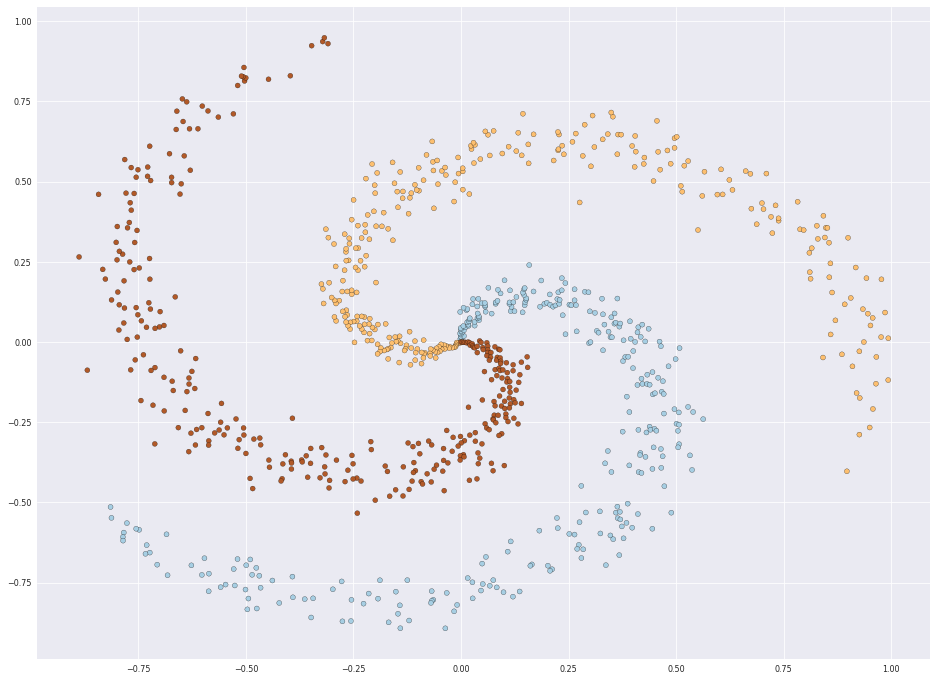

In [9]:
X, y = datasets.spirals(300)
plotting.scatter(X, y)

In [5]:
def make_model(input_shape, output_shape, n_layers, activation, hidden_size=10):
    n_hidden_layers = n_layers - 2

    layers = []
    layers.append(Linear(input_shape, hidden_size))
    layers.append(BatchNormalization(hidden_size))
    layers.append(activation())
    
    for i in range(n_hidden_layers):
        layers.append(Linear(hidden_size, hidden_size))
        layers.append(BatchNormalization(hidden_size))
        layers.append(activation())
        
    layers.append(Linear(hidden_size, output_shape))
    layers.append(Softmax())
    
    return Sequential(*layers)

In [6]:
def get_losses(model, n_epochs=2000):
    loss = CategoricalCrossEntropy()
    losses = []

    learning_rate = 0.03
    for epoch in range(n_epochs):
        z = model(X)

        error = loss(z, y)
        losses.append(error)

        gradient = loss.gradient()
        gradient = model.backward(gradient)

        for parameter in model.trainable_parameters():
            parameter -= learning_rate * parameter.grad
    
    return losses

In [ ]:
n_layers = 20
hidden_size = 10

print('Sigmoid')
model = make_model(X.shape[1], 3, n_layers=n_layers, activation=Sigmoid, hidden_size=hidden_size)
sigmoid_losses = get_losses(model)
print(sigmoid_losses[-1])

print('Tanh')
model = make_model(X.shape[1], 3, n_layers=n_layers, activation=Tanh, hidden_size=hidden_size)
tanh_losses = get_losses(model)
print(tanh_losses[-1])

print('ReLU')
model = make_model(X.shape[1], 3, n_layers=n_layers, activation=ReLU, hidden_size=hidden_size)
relu_losses = get_losses(model)
print(relu_losses[-1])

print('LeakyReLU')
model = make_model(X.shape[1], 3, n_layers=n_layers, activation=LeakyReLU, hidden_size=hidden_size)
lrelu_losses = get_losses(model)
print(lrelu_losses[-1])

print('Parametric ReLU')
model = make_model(X.shape[1], 3, n_layers=n_layers, activation=PReLU, hidden_size=hidden_size)
prelu_losses = get_losses(model)
print(prelu_losses[-1])

plt.plot(np.arange(len(sigmoid_losses)), sigmoid_losses, label='Sigmoid')
plt.plot(np.arange(len(tanh_losses)), tanh_losses, label='Tanh')
plt.plot(np.arange(len(relu_losses)), relu_losses, label='ReLU')
plt.plot(np.arange(len(lrelu_losses)), lrelu_losses, label='Leaky ReLU')
plt.plot(np.arange(len(prelu_losses)), prelu_losses, label='Parametric ReLU')
plt.legend()

Sigmoid
0.3550299846137159
Tanh
0.9781031262861388
ReLU
0.04857578727223766
LeakyReLU
